In [4]:
import numpy as np
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt

def compute_global_chm_min_max(chm_dir):
    """Compute the minimum and maximum CHM value across the dataset"""
    chm_files = glob(os.path.join(chm_dir, "*.npy"))

    for i, chm_path in enumerate(chm_files):
        chm = np.load(chm_path)
        chm = np.nan_to_num(chm, nan=0)
        if i == 0:
            chm_min = np.min(chm)
            chm_max = np.max(chm)
        chm_min = min(chm_min, np.min(chm))
        chm_max = max(chm_max, np.max(chm))

    return chm_min, chm_max


def sqrt_rescale(chm):
    """non-linear rescaling of CHM"""
    chm_rescaled = np.sqrt(chm)
    return chm_rescaled.astype(np.uint8)

def merge_chm_rgb(chm_path, rgb_path, global_min, global_max):
    chm = np.load(chm_path)
    rgb = cv2.imread(rgb_path, cv2.IMREAD_UNCHANGED)

    # cv2 reads images in BGR, so convert it to RGB
    rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)

    # Replace NaN values with 0
    chm = np.nan_to_num(chm, nan=0.0)

    # Upsample CHM to RGB's size
    chm_resized = cv2.resize(chm, (rgb.shape[1], rgb.shape[0]), interpolation=cv2.INTER_CUBIC)

    # Normalize CHM to 0-255 range
    chm_scaled = (chm_resized - global_min) / (global_max - global_min) * 255
    chm_scaled = chm_scaled.astype(np.uint8)

    # Apply square root rescaling for non-linear transformation
    chm_scaled = sqrt_rescale(chm_scaled)

    rgb_chm = rgb.copy()
    # Replace the blue channel with the CHM
    rgb_chm[:,:,2] = chm_scaled
    return rgb_chm

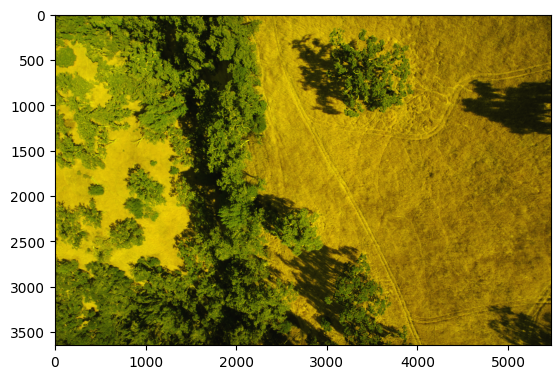

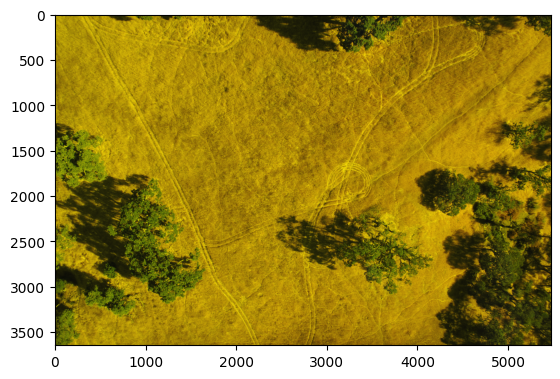

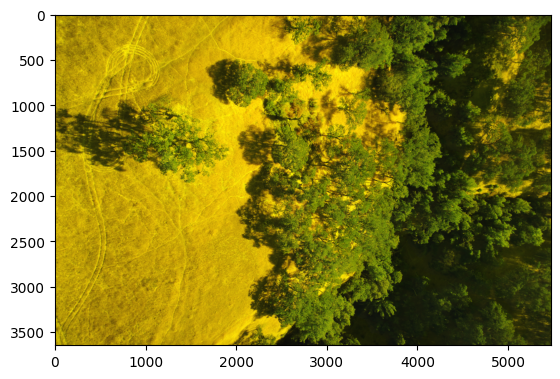

In [5]:
# Set the input directories
chm_files = sorted(glob("/ofo-share/scratch-ciro/ucnrs-exp/2023-ucnrs/000610/000610-01/00/*.npy"))
rgb_files = sorted(glob("/ofo-share/drone-imagery-organization/3_sorted-notcleaned-combined/2023-ucnrs/000610/000610-01/00/*.JPG"))

global_min, global_max = compute_global_chm_min_max("/ofo-share/scratch-ciro/ucnrs-exp/2023-ucnrs/000610/000610-01/00/")

i = 0  # number of images to visualize
for chm, rgb in zip(chm_files, rgb_files):
    if i < 3:
        rgb_chm = merge_chm_rgb(chm, rgb, float(global_min), float(global_max))
        i += 1

        # Visualize the result
        plt.imshow(rgb_chm)
        plt.show()

In [7]:
rgb_chm[:,:,0]

array([[180, 183, 185, ...,  71,  69,  67],
       [179, 183, 187, ...,  69,  68,  67],
       [179, 183, 187, ...,  63,  61,  61],
       ...,
       [155, 151, 144, ...,  39,  40,  42],
       [161, 156, 150, ...,  37,  36,  37],
       [167, 164, 161, ...,  37,  35,  36]],
      shape=(3648, 5472), dtype=uint8)

In [8]:
rgb_chm[:,:,1]

array([[153, 156, 156, ...,  83,  81,  79],
       [152, 156, 160, ...,  79,  78,  77],
       [151, 155, 159, ...,  73,  71,  71],
       ...,
       [131, 127, 120, ...,  40,  41,  43],
       [137, 132, 126, ...,  38,  37,  38],
       [143, 140, 137, ...,  38,  36,  37]],
      shape=(3648, 5472), dtype=uint8)

In [9]:
rgb_chm[:,:,2]

array([[ 6,  6,  6, ...,  5,  5,  5],
       [ 6,  6,  6, ...,  5,  5,  5],
       [ 6,  6,  6, ...,  5,  5,  5],
       ...,
       [ 6,  6,  6, ..., 11, 11, 11],
       [ 6,  6,  6, ..., 11, 11, 11],
       [ 6,  6,  6, ..., 11, 11, 11]], shape=(3648, 5472), dtype=uint8)